In [11]:
import fastf1 as ff1
import fastf1.plotting
import matplotlib.pyplot as plt
import pandas as pd


fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [12]:
# Enable the cache
ff1.Cache.enable_cache('fastf1_cache') 


In [13]:
test2023 = ff1.get_event_schedule(2023) #get all races information and list
#test2023.head()
#print(test2023)

    RoundNumber        Country           Location  \
0             0        Bahrain             Sakhir   
1             1        Bahrain             Sakhir   
2             2   Saudi Arabia             Jeddah   
3             3      Australia          Melbourne   
4             4     Azerbaijan               Baku   
5             5  United States              Miami   
6             6         Monaco             Monaco   
7             7          Spain          Barcelona   
8             8         Canada           Montréal   
9             9        Austria          Spielberg   
10           10  Great Britain        Silverstone   
11           11        Hungary           Budapest   
12           12        Belgium  Spa-Francorchamps   
13           13    Netherlands          Zandvoort   
14           14          Italy              Monza   
15           15      Singapore         Marina Bay   
16           16          Japan             Suzuka   
17           17          Qatar             Lus

# Qualifying Analysis

In [14]:
sessionQ = ff1.get_session(2023, 12, 'Q') #get qualifying
sessionQ.load()

core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v2.3.1]


api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '44', '55', '81', '4', '63', '14', '18', '22', '10', '20', '77', '31', '23', '24', '2', '3', '27']


In [15]:
#get fastest laps
ver_lap = sessionQ.laps.pick_driver('VER').pick_fastest()
lec_lap = sessionQ.laps.pick_driver('LEC').pick_fastest()
alo_lap = sessionQ.laps.pick_driver('ALO').pick_fastest()

In [16]:
ver_tel = ver_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()

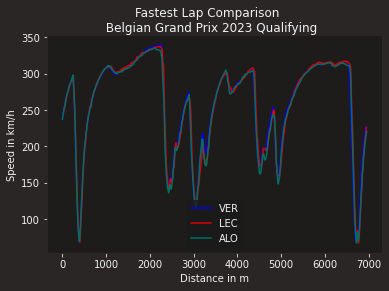

In [17]:
rbr_color = fastf1.plotting.team_color('RBR')
fer_color = fastf1.plotting.team_color('FER')
amr_color = fastf1.plotting.team_color('aston martin')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=fer_color, label='LEC')
ax.plot(alo_tel['Distance'], alo_tel['Speed'], color=amr_color, label='ALO')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{sessionQ.event['EventName']} {sessionQ.event.year} Qualifying")

plt.show()

# Race Analysis

In [18]:
sessionR = ff1.get_session(2023, 12, 'R') #get race information in the cache
sessionR.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '44', '14', '63', '4', '31', '18', '22', '10', '77', '24', '23', '20', '3', '2', '27', '55', '81']
